# Exploring rebalancing

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
RANDOM_SEED = 666
generator = np.random.seed(RANDOM_SEED)

In [12]:
def generate_uniform_ticker_data(price_range_min: float, price_range_max: float, days: int = 200):
    # return ndarray of shape (days, 2)
    # second dim has open and closing prices
    return np.random.uniform(price_range_min, price_range_max, (days, 2))

generate_uniform_ticker_data(400, 500, 20)

array([[451.07070328, 499.47701223],
       [470.0497018 , 402.06614677],
       [417.82752238, 466.55087122],
       [430.50309989, 494.96725103],
       [448.5825885 , 416.92052563],
       [479.28518066, 430.38521681],
       [441.10111629, 492.00879558],
       [451.34787439, 457.07183714],
       [496.52706981, 457.79062112],
       [471.91902615, 480.2277993 ],
       [400.63402588, 491.05553835],
       [423.69823534, 409.6465187 ],
       [434.64366102, 463.81460401],
       [462.04572732, 426.78939768],
       [439.10099027, 408.06131811],
       [441.2078487 , 474.14454108],
       [413.53493992, 427.34139332],
       [403.54259922, 442.41322616],
       [413.28994799, 482.47880821],
       [417.85783766, 443.93973496]])

<Axes: >

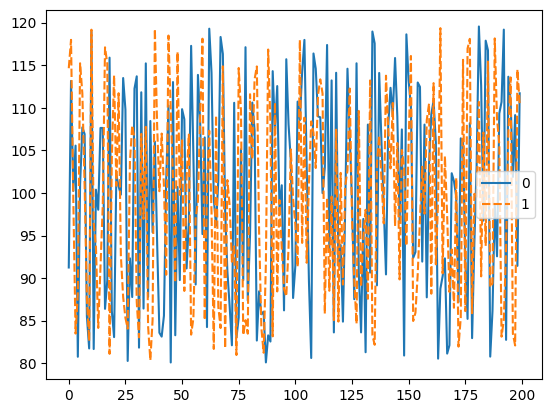

In [16]:
sns.lineplot(generate_uniform_ticker_data(80, 120))

In [17]:
STARTING_CAPITAL = 10_000
# TAX_PERC = 0
STONKS = 3
# equal rebalancin for now

In [ ]:
stonks_data = np.stack([
    generate_uniform_ticker_data()
    for _ in STONKS
])

In [ ]:
def simulation(days)